In [1]:
import sys
import os

current_dir = os.getcwd()
project_path = os.path.join(current_dir, '..')
sys.path.append(project_path)

In [2]:
%matplotlib ipympl

import matplotlib.pyplot as plt
import numpy as np
import loss
from mlnn.engine import MLNNEngine
from mlnn.callback import MLNNCallback
from mlnn.optimize import MLNNSteepestDescent, MLNNBFGS

from sklearn.datasets import load_wine
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score

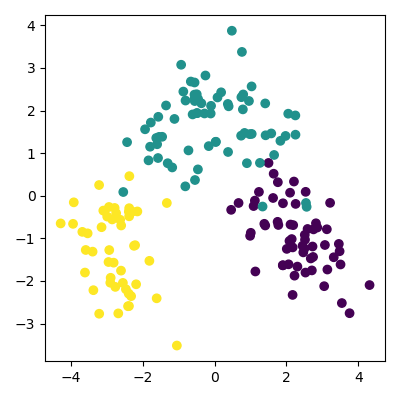

In [3]:
data = load_wine()

X_original = np.array(data['data'])
Y_original = np.array(data['target'], dtype=int)

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(X_original, Y_original):
    X_train, Y_train = X_original[train_index, :], Y_original[train_index]
    X_test, Y_test = X_original[test_index, :], Y_original[test_index]

X_train, Y_train = X_original, Y_original
X_test, Y_test = X_original, Y_original

pipeline = Pipeline([('std_scaler', StandardScaler())])
X_train_scaled = pipeline.fit_transform(X_train)
X_test_scaled = pipeline.transform(X_test)

pca = PCA(n_components=2)
X_train_2D = pca.fit_transform(X_train_scaled)

fig, ax = plt.subplots(1, 1, figsize=(4, 4))
ax.scatter(X_train_2D[:, 0], X_train_2D[:, 1], c=Y_train)

fig.tight_layout()
plt.show()

In [4]:
knn = KNeighborsClassifier(3)
knn.fit(X_train_scaled, Y_train)
Y_test_pred = knn.predict(X_test_scaled)
accuracy = accuracy_score(Y_test, Y_test_pred)
print(f"accuracy = {accuracy: .3f}")

accuracy =  0.961


In [5]:
rbf = False

kernel = 'linear'
#kernel = 'nonlinear'

#a_mode = 'full'
#a_mode = 'diagonal'
a_mode = 'decomposed'

e_mode = 'single'
#e_mode = 'multiple'

#i_mode = 'zero'
#i_mode = 'random'
#i_mode = 'centered'
#i_mode = 'identity'
i_mode = 'pca'

keep_a_psd = False
keep_a_centered = False
keep_e_positive = False
reduce_derivative_matrix = False
check_array_equal = False

n_components = 2

r = 1
s = 0
l = 1
q = 1
inner_loss = loss.SmoothReLU(.5)
outer_loss = loss.SmoothReLU(.5)
#outer_loss = None

optimize_method = 'fixed'
initialization = i_mode
min_delta_F = 1e-6
max_steps = 100
max_time = 1000
fixed_arguments = 'AE'
max_arg_steps = 5

line_search_method = 'backtracking'
use_prev_f = False
alpha_0 = 1e-3
armijo = 1e-6
wolfe = .9
max_ls_iterations = 20

In [6]:
X = X_train_scaled
Y = Y_train

sigma2 = 10 ** 1.12
P = X @ X.T
D = P.diagonal().reshape(-1, 1) + P.diagonal().reshape(1, -1) - 2 * P
G = np.exp(D / (-2 * sigma2))

In [7]:
if kernel == 'linear':
    B = X
elif kernel == 'nonlinear':
    if rbf:
        B = G
    else:
        B = G

if kernel == 'linear':
    C = None
elif kernel == 'nonlinear':
    #C = B
    C = None

In [8]:
mlnn_params = {
    'r': r,
    's': s,
    'l': l,
    'q': q,
    'inner_loss': inner_loss,
    'outer_loss': outer_loss,
    'kernel': kernel,
    'a_mode': a_mode,
    'e_mode': e_mode,
    'keep_a_psd': keep_a_psd,
    'keep_a_centered': keep_a_centered,
    'keep_e_positive': keep_e_positive,
    'reduce_derivative_matrix': reduce_derivative_matrix,
    'check_array_equal': check_array_equal,
}

optimize_params = {
    'optimize_method': optimize_method,
    'initialization': initialization,
    'min_delta_F': min_delta_F,
    'max_steps': max_steps,
    'max_time': max_time,
    'fixed_arguments': fixed_arguments,
    'max_arg_steps': max_arg_steps,
}

line_search_params = {
    'line_search_method': line_search_method,
    'use_prev_f': use_prev_f,
    'alpha_0': alpha_0,
    'armijo': armijo,
    'wolfe': wolfe,
    'max_ls_iterations': max_ls_iterations,
}

In [ ]:
mlnn = MLNNEngine(B, Y, C, mlnn_params)
#callback = MLNNCallback(print_stats=True)
callback = MLNNCallback(show_figures=True)
optimizer = MLNNSteepestDescent(mlnn, callback=callback, n_components=n_components,
                                optimize_params=optimize_params,
                                line_search_params=line_search_params)
optimizer.minimize(verbose=False)
#optimizer.report()

In [ ]:
line_search_params['line_search_method'] = 'strong_wolfe'
mlnn = MLNNEngine(B, Y, C, mlnn_params)
callback = MLNNCallback(print_stats=True)
optimizer = MLNNSteepestDescent(mlnn, callback=callback, n_components=n_components,
                                optimize_params=optimize_params,
                                line_search_params=line_search_params)
optimizer.minimize(verbose=False)
optimizer.report()

In [ ]:
mlnn = MLNNEngine(B, Y, C, mlnn_params)
callback = MLNNCallback(print_stats=True)
optimizer = MLNNBFGS(mlnn, callback=callback, n_components=n_components,
                     optimize_params=optimize_params,
                     line_search_params=line_search_params)
optimizer.minimize(verbose=False)
optimizer.report()

In [ ]:
X = np.random.randint(0, 10, (5, 2))
A = np.array([1, 2, 4])
T = np.full(X.shape[0], False)
T[A] = True
X, A, X[A, :], T, X[T, 0], X[~T, 0]

In [ ]:

active = np.full(X.shape[0], False)
active[self.optimizer.mlnn.subset_active_rows] = True
artist1 = self.ax1.scatter(X[~active, 0], X[~active, 1]

In [ ]:
A = np.array([4,2,-3,-5])
B = np.diag(A)
B[1,2] = 7
B[3,2] = 8
C, D = np.linalg.eigh(B)
np.vstack((D, np.zeros((0, 4))))
E = B.copy()
E[[2,3]] *= -1
B, E, B[2]

In [ ]:
def make_first_nonzero_nonnegative(arr):
    # Create a boolean mask for where the first nonzero elements are negative
    first_nonzero_indices = np.argmax(arr != 0, axis=1)  # Find the index of the first nonzero element in each row
    first_nonzero_elements = arr[np.arange(arr.shape[0]), first_nonzero_indices]  # Get the first nonzero element in each row

    # Identify rows where the first nonzero element is negative
    negative_rows = first_nonzero_elements < 0

    # Multiply those rows by -1 to make their first nonzero element nonnegative
    arr[negative_rows] *= -1

    return arr

# Example usage
arr = np.array([
    [0, -1, 2],
    [-3, 4, 0],
    [1, -5, 6]
])

result = make_first_nonzero_nonnegative(arr)
print(result)

In [21]:
Y.reshape(-1,1).ndim

2